## データの取り込みと確認

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white") #グラフのプロパティを設定
plt.rcParams["figure.figsize"] = [10, 5] #グラフの大きさを設定
pd.set_option('display.max_columns', 150) #表示する列数の上限を150に設定
pd.set_option('display.max_rows', 50) #表示する行数の上限を50に設定

In [51]:
# データの取り込み
df_master = pd.read_csv("Portugal_bank_analysis_data.csv")
df = df_master.copy()
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,fixed_deposit_contract
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
4,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


infoメソッドやdescribeメソッドを使って、おかしなデータがないか確認する。

In [52]:
#データの欠損と型の確認(info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40211 entries, 0 to 40210
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      40211 non-null  int64 
 1   age                     40211 non-null  int64 
 2   job                     40211 non-null  object
 3   marital                 40211 non-null  object
 4   education               40211 non-null  object
 5   default                 40211 non-null  object
 6   balance                 40211 non-null  int64 
 7   housing                 40211 non-null  object
 8   loan                    40211 non-null  object
 9   contact                 40211 non-null  object
 10  day                     40211 non-null  int64 
 11  month                   40211 non-null  object
 12  duration                40211 non-null  int64 
 13  campaign                40211 non-null  int64 
 14  pdays                   40211 non-null  int64 
 15  pr

In [53]:
#データ要約確認(describe)
display(df.describe())
display(df.describe(include="object"))

,ID,age,balance,day,duration,campaign,pdays,previous
count,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000,40211.000000
mean,22624.703788,40.932208,1369.058442,15.809480,258.614459,2.754744,40.294372,0.585039
std,13032.800177,10.621005,3063.726303,8.330412,259.249038,3.102956,100.240920,2.366232
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11345.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22683.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33891.500000,48.000000,1433.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


,job,marital,education,default,housing,loan,contact,month,poutcome,fixed_deposit_contract
count,40211,40211,40211,40211,40211,40211,40211,40211,40211,40211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,8642,24160,20624,39488,22335,33790,26088,12254,32855,35499


In [54]:
#集計しやすいように定期契約yesを1,noを0に変換しておく
df["fixed_deposit_contract"] = np.where(df["fixed_deposit_contract"] == "yes" ,1,0)


## 課題1. 現状どれくらいの人が定期預金の契約をしてくれているのか？ 

定期預金の契約数の確認する  
定期預金の契約数、契約率の算出する  

/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/2510607876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="fixed_deposit_contract",data=df,palette="Blues")


<Axes: xlabel='fixed_deposit_contract', ylabel='count'>

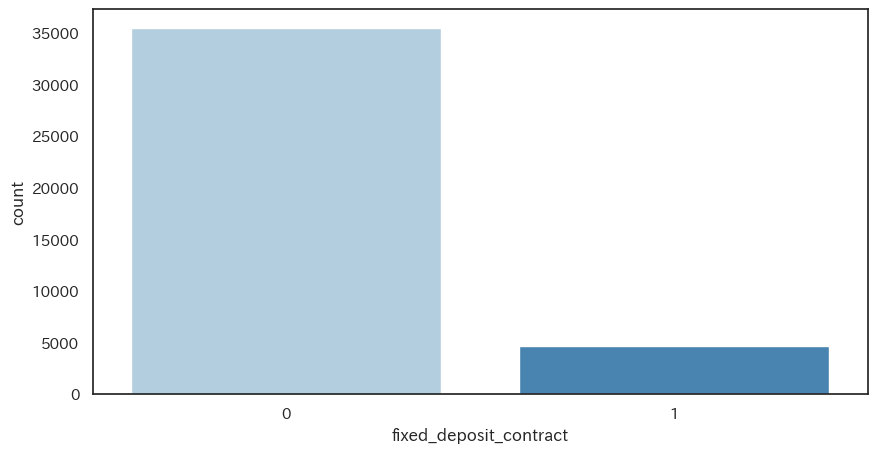

In [25]:
#定期預金の契約数の確認
sns.countplot(x="fixed_deposit_contract",data=df,palette="Blues")

In [29]:
#定期預金の契約数、契約率の算出
display(df.groupby("fixed_deposit_contract").count()["ID"])#契約数
df["fixed_deposit_contract"].mean()#契約率

fixed_deposit_contract
0    35499
1     4712
Name: ID, dtype: int64

np.float64(0.11718186565865062)

## 課題2. どのような背景や属性を持つ顧客が定期預金を契約する傾向にあるのか？

age, job, marital, education, default, balance, housing, loan, poutcomeなどと定期預金契約との関係性を確認する  
→契約した人と契約していない人で上記の変数のヒストグラムを作成する + 統計値(平均など)の差を確認する

/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/3256689808.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('fixed_deposit_contract == 0')["age"], kde=False, label="no", color="gray")
/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/3256689808.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

,count,mean,std,min,25%,50%,75%,max
fixed_deposit_contract,,,,,,,,
0,35499.0,40.842615,10.180834,18.0,33.0,39.0,48.0,95.0
1,4712.0,41.607173,13.465065,18.0,31.0,38.0,50.0,95.0


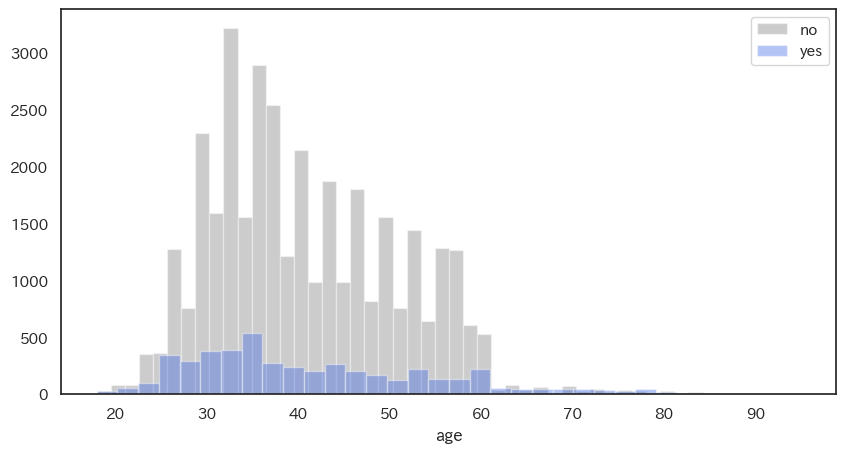

In [34]:
#age
sns.distplot(df.query('fixed_deposit_contract == 0')["age"], kde=False, label="no", color="gray")
sns.distplot(df.query('fixed_deposit_contract == 1')["age"], kde=False, label="yes", color="royalblue")
plt.legend()
df.groupby("fixed_deposit_contract").describe()["age"] #グループごとの集計値

job
admin.           0.123188
blue-collar      0.073016
entrepreneur     0.084784
housemaid        0.083865
management       0.136557
retired          0.224327
self-employed    0.120199
services         0.090588
student          0.280765
technician       0.111487
unemployed       0.158798
unknown          0.123552
Name: fixed_deposit_contract, dtype: float64

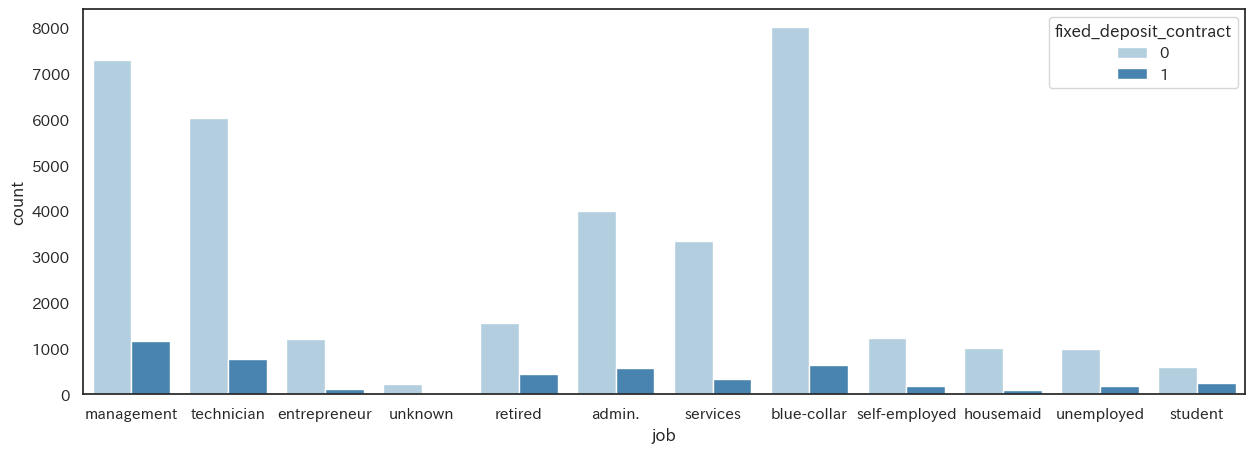

In [37]:
#job
fig = plt.subplots(figsize=(15,5))
sns.countplot(x="job",hue='fixed_deposit_contract',data=df,palette="Blues")
df.groupby(["job"]).mean(numeric_only=True)["fixed_deposit_contract"]

In [39]:
#marital
sns.countplot(x="marital",hue='fixed_deposit_contract',dataa=df,palette="Blues")
df.groupby(["marital"].mean(numeric_only=True)["fixed_deposit_contract"])

ValueError: Could not interpret value `marital` for `x`. Value is a string, but `data` was not passed.

education
primary      0.087800
secondary    0.105751
tertiary     0.149835
unknown      0.133777
Name: fixed_deposit_contract, dtype: float64

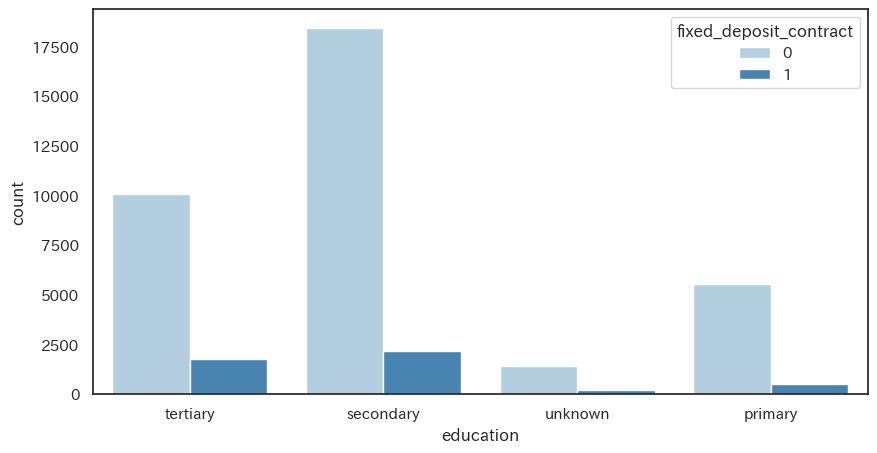

In [40]:
#education
sns.countplot(x="education",hue="fixed_deposit_contract",data=df,palette="Blues")
df.groupby(["education"]).mean(numeric_only=True)["fixed_deposit_contract"]

default
no     0.118188
yes    0.062241
Name: fixed_deposit_contract, dtype: float64

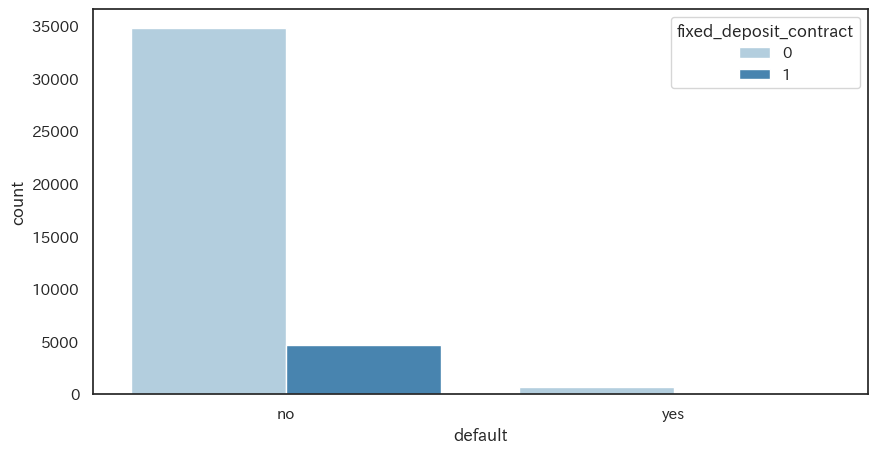

In [44]:
#default
sns.countplot(x="default",hue='fixed_deposit_contract',data=df,palette="Blues")
df.groupby(['default']).mean(numeric_only=True)["fixed_deposit_contract"]


/usr/local/Cellar/jupyterlab/4.4.1/libexec/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/Cellar/jupyterlab/4.4.1/libexec/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/426449683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('fixed_deposit_contract == 0 and balance <= 8000 and balance >= -2000')["balance"], kde=False, label="n

,count,mean,std,min,25%,50%,75%,max
fixed_deposit_contract,,,,,,,,
0,35499.0,1308.062143,2980.883743,-8019.0,58.0,419.0,1350.5,102127.0
1,4712.0,1828.588922,3594.772110,-3058.0,206.0,718.5,2166.0,81204.0


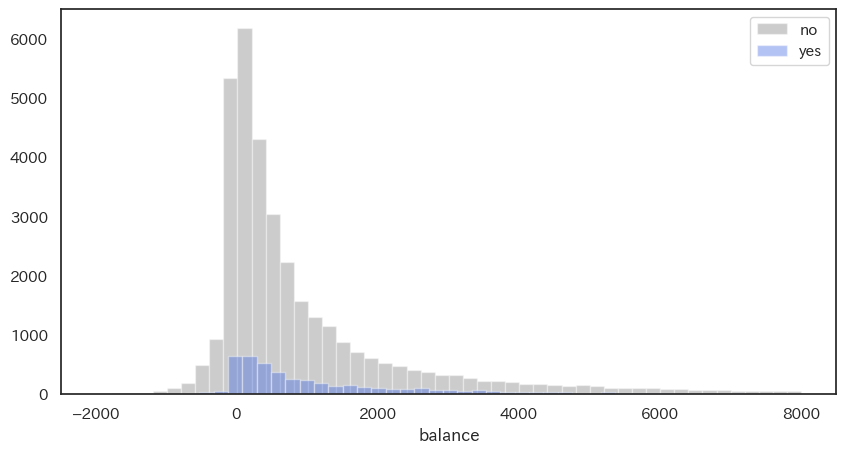

In [47]:
#balance
df["log_balance"] = np.log(df["balance"])
sns.distplot(df.query('fixed_deposit_contract == 0 and balance <= 8000 and balance >= -2000')["balance"], kde=False, label="no", color="gray")
sns.distplot(df.query('fixed_deposit_contract == 1 and balance <= 8000 and balance >= -2000')["balance"], kde=False, label="yes", color="royalblue")
plt.legend()
df.groupby("fixed_deposit_contract").describe()["balance"]


housing
no     0.167487
yes    0.076920
Name: fixed_deposit_contract, dtype: float64

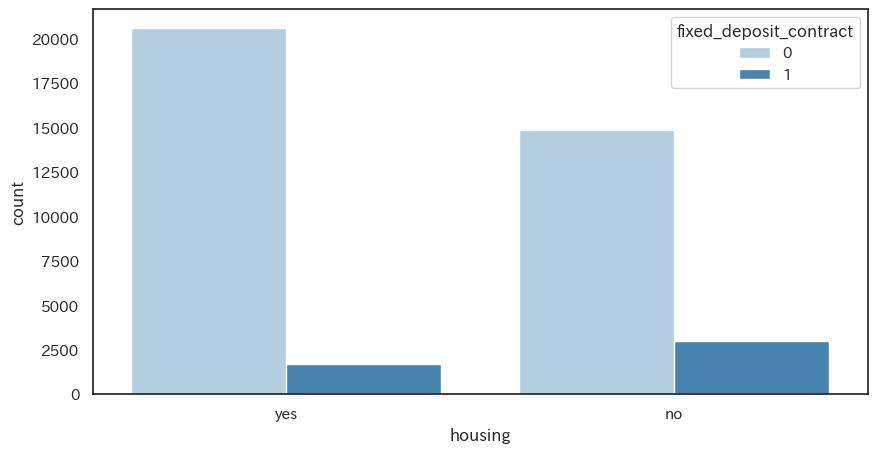

In [58]:
#housing


sns.countplot(x="housing", hue='fixed_deposit_contract', data=df, palette="Blues")
df.groupby(["housing"]).mean(numeric_only=True)["fixed_deposit_contract"] #グループごとの契約率


loan
no     0.126753
yes    0.066812
Name: fixed_deposit_contract, dtype: float64

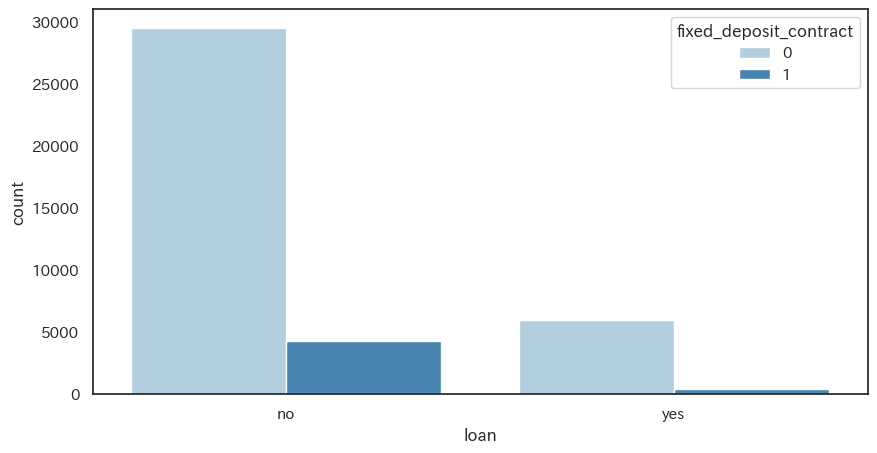

In [62]:
#loan
sns.countplot(x="loan",hue='fixed_deposit_contract',data=df,palette='Blues')
df.groupby(['loan']).mean(numeric_only=True)['fixed_deposit_contract']

poutcome
failure    0.125114
other      0.163614
success    0.650376
unknown    0.092223
Name: fixed_deposit_contract, dtype: float64

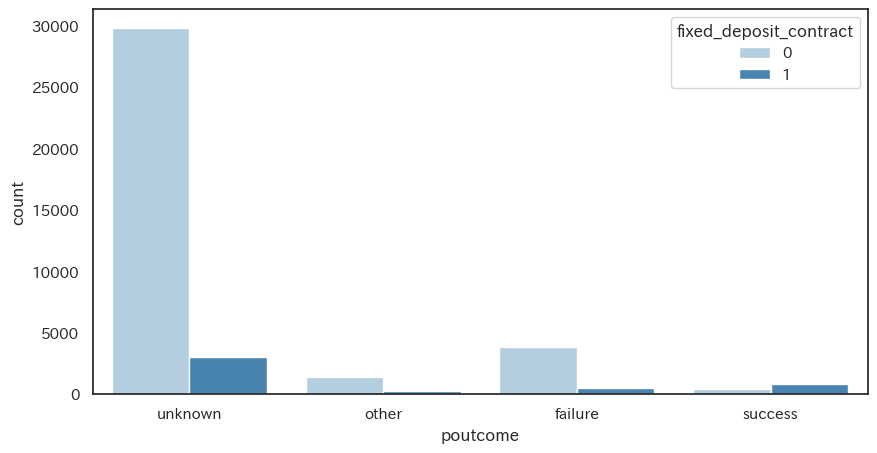

In [63]:
#poutcome
sns.countplot(x="poutcome",hue='fixed_deposit_contract',data=df,palette='Blues')
df.groupby(["poutcome"]).mean(numeric_only=True)['fixed_deposit_contract']

## 課題3. 今後定期預金の契約数を上げるために、どのようなアクションを起こすべきか？

contact, month, day, campaign, previousなどと定期預金契約との関係性を確認する  
→契約した人と契約していない人で上記の変数のヒストグラムを作成する + 各アクションの数値ごとの契約率、契約数を確認する

contact
cellular     0.149647
telephone    0.131267
unknown      0.040400
Name: fixed_deposit_contract, dtype: float64

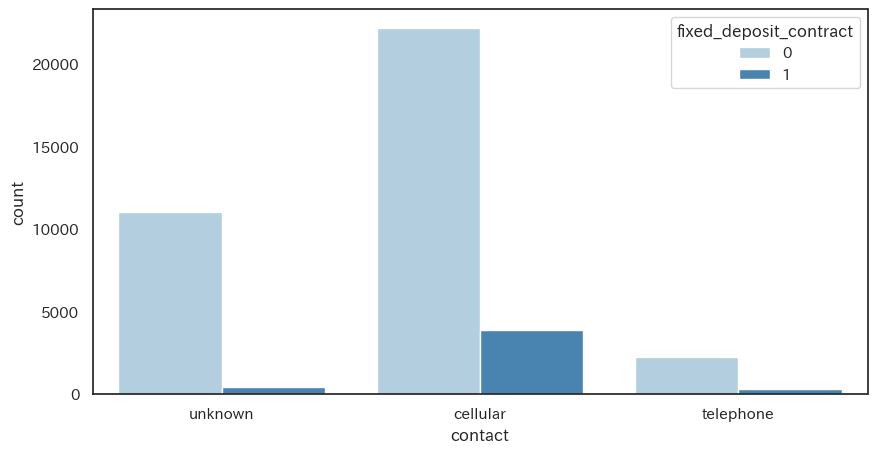

In [65]:
#contact
sns.countplot(x='contact',hue="fixed_deposit_contract",data=df,palette="Blues")
df.groupby(['contact']).mean(numeric_only=True)["fixed_deposit_contract"]


fixed_deposit_contract                                             
                       count      mean       std  min  25%  50%  75%  max
month                                                                    
01                    1268.0  0.102524  0.303455  0.0  0.0  0.0  0.0  1.0
02                    2369.0  0.166315  0.372442  0.0  0.0  0.0  0.0  1.0
03                     429.0  0.529138  0.499733  0.0  0.0  1.0  1.0  1.0
04                    2617.0  0.197554  0.398230  0.0  0.0  0.0  0.0  1.0
05                   12254.0  0.067488  0.250876  0.0  0.0  0.0  0.0  1.0
06                    4700.0  0.102766  0.303685  0.0  0.0  0.0  0.0  1.0
07                    6096.0  0.090223  0.286525  0.0  0.0  0.0  0.0  1.0
08                    5559.0  0.111531  0.314817  0.0  0.0  0.0  0.0  1.0
09                     496.0  0.451613  0.498156  0.0  0.0  0.0  1.0  1.0
10                     644.0  0.433230  0.495907  0.0  0.0  0.0  1.0  1.0
11                    3582.0  0.102178  0.302924  0.0  0.0  0.0  0.0  1.0
12                     197.0  0.482234  0.500957  0.0  0.0  0.0  1.0  1.0

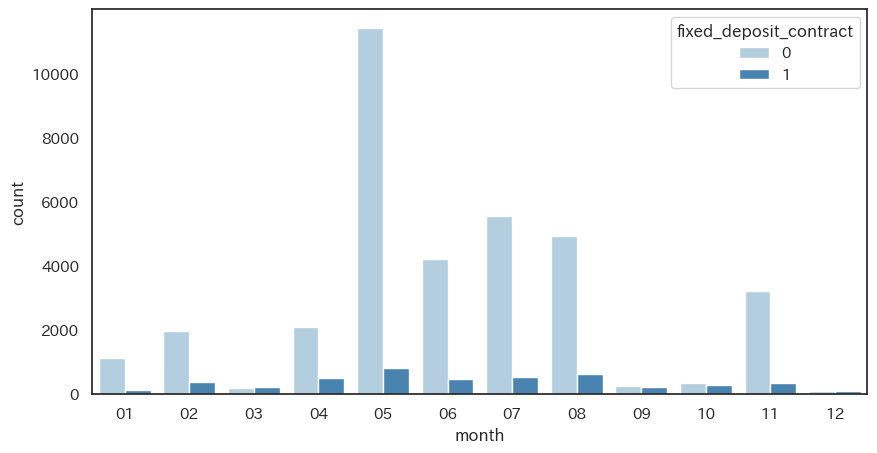

In [68]:
#month
df["month"] = df["month"].map({"jan": "01",  "feb": "02", "mar": "03", "apr": "04", "may": "05", "jun": "06", "jul": "07", "aug": "08", "sep": "09", "oct": "10", "nov": "11", "dec": "12"})
sns.countplot(x="month", hue='fixed_deposit_contract', data=df, palette="Blues", order=["01","02","03","04","05","06","07","08","09","10","11","12"])
df[["fixed_deposit_contract", "month"]].groupby(["month"]).describe() #グループごとのサマリー

#データを見ると各月でキャンペーン戦略が違った可能性があるので、各月の戦略を見て最も最適だった月のやり方を踏襲するのが良さそう。
#5~8月はデータ数も契約数も多いが、契約率も悪い(積極的に接触していた期間なのかも)
#特に5月は一番データ数が多いが、一番契約率が悪い。しかし結果的に契約数が一番取れているのは5月(そこにかかる労力を考慮しなければ、とにかく数多くの人に接触するのが契約数を取るには良いということになる)。
#2,4月はデータ数はそこまで多くないが契約率が良いため、効率を重視するのであればこの期間の振り返りが役立ちそう

/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/111826291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('fixed_deposit_contract == 0')["day"],kde=False,label="no",color="gray",bins=30)
/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/111826291.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

day
1     0.276817
2     0.138986
3     0.167183
4     0.160532
5     0.110787
6     0.094571
7     0.087980
8     0.106642
9     0.115051
10    0.216387
11    0.126911
12    0.156077
13    0.155172
14    0.109223
15    0.136514
16    0.137380
17    0.091335
18    0.098345
19    0.068766
20    0.071575
21    0.101329
22    0.163366
23    0.134293
24    0.142494
25    0.162198
26    0.111351
27    0.130653
28    0.081014
29    0.071703
30    0.177385
31    0.066667
Name: fixed_deposit_contract, dtype: float64

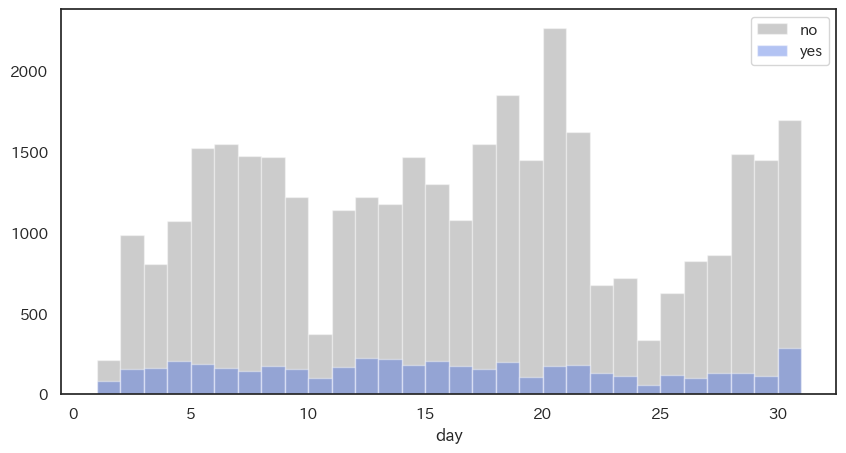

In [71]:
#day
sns.distplot(df.query('fixed_deposit_contract == 0')["day"],kde=False,label="no",color="gray",bins=30)
sns.distplot(df.query('fixed_deposit_contract == 1')['day'],kde=False,label="yes",color='royalblue',bins=30)
plt.legend()
df.groupby(["day"]).mean(numeric_only=True)["fixed_deposit_contract"]

/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/755993016.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('fixed_deposit_contract ==0 and campaign<=10')["campaign"], kde=False,label='no',color="gray",bins=30)
/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/755993016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gis

,count,mean,std,min,25%,50%,75%,max
fixed_deposit_contract,,,,,,,,
0,35499.0,2.835798,3.217087,1.0,1.0,2.0,3.0,63.0
1,4712.0,2.144100,1.942342,1.0,1.0,2.0,3.0,32.0


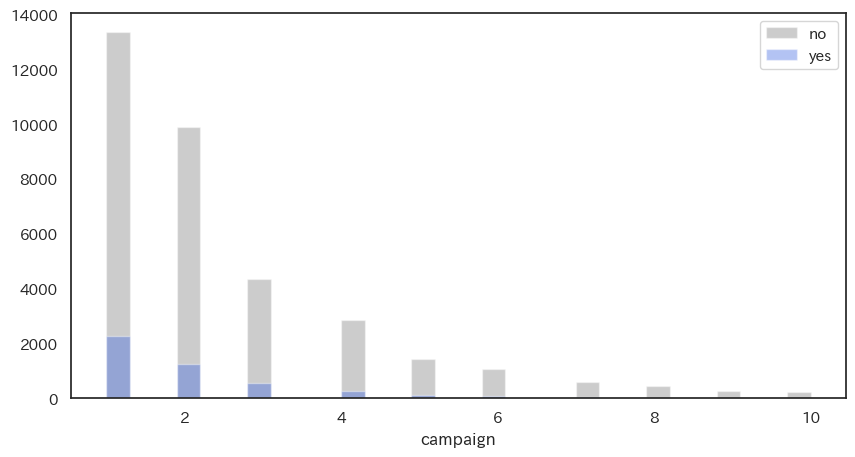

In [79]:
#campaign
sns.distplot(df.query('fixed_deposit_contract ==0 and campaign<=10')["campaign"], kde=False,label='no',color="gray",bins=30)
sns.distplot(df.query('fixed_deposit_contract ==1 and campaign<=10')["campaign"], kde=False,label='yes',color="royalblue",bins=30)
plt.legend()
df.groupby("fixed_deposit_contract").describe()["campaign"]



/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/2270831600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('fixed_deposit_contract == 0 and previous <= 10')["previous"], kde=False, label="no", color="gray", bins=30)
/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_86507/2270831600.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
htt

,count,mean,std,min,25%,50%,75%,max
fixed_deposit_contract,,,,,,,,
0,35499.0,0.507704,2.324768,0.0,0.0,0.0,0.0,275.0
1,4712.0,1.167657,2.584819,0.0,0.0,0.0,1.0,58.0


fixed_deposit_contract                                             
                          count      mean       std  min  25%  50%  75%  max
previous                                                                    
0                       32850.0  0.092177  0.289279  0.0  0.0  0.0  0.0  1.0
1                        2470.0  0.208502  0.406320  0.0  0.0  0.0  0.0  1.0
2                        1874.0  0.210245  0.407592  0.0  0.0  0.0  0.0  1.0
3                        1028.0  0.261673  0.439760  0.0  0.0  0.0  1.0  1.0
4                         640.0  0.237500  0.425884  0.0  0.0  0.0  0.0  1.0
5                         398.0  0.266332  0.442596  0.0  0.0  0.0  1.0  1.0
6                         244.0  0.295082  0.457017  0.0  0.0  0.0  1.0  1.0
7                         177.0  0.276836  0.448704  0.0  0.0  0.0  1.0  1.0
8                         116.0  0.284483  0.453125  0.0  0.0  0.0  1.0  1.0
9                          79.0  0.291139  0.457190  0.0  0.0  0.0  1.0  1.0
10                         61.0  0.377049  0.488669  0.0  0.0  0.0  1.0  1.0

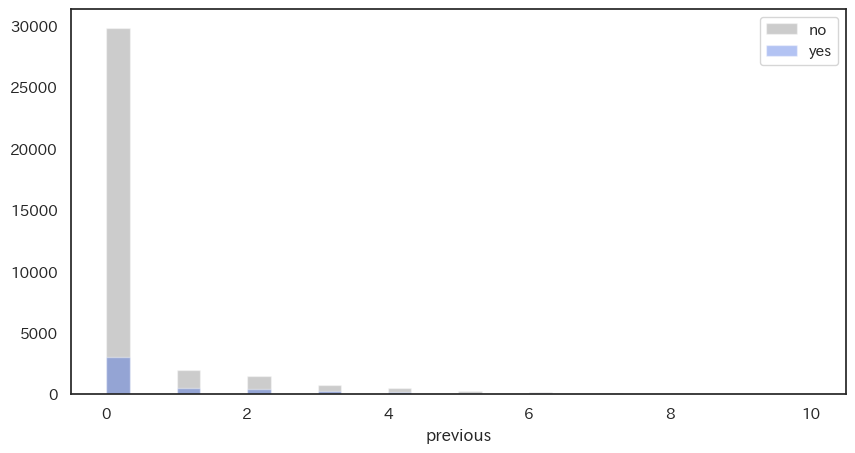

In [83]:
#previous
sns.distplot(df.query('fixed_deposit_contract == 0 and previous <= 10')["previous"], kde=False, label="no", color="gray", bins=30)
sns.distplot(df.query('fixed_deposit_contract == 1 and previous <= 10')["previous"], kde=False, label="yes", color="royalblue", bins=30)
plt.legend()
display(df.groupby("fixed_deposit_contract").describe()["previous"]) #グループごとの集計値
df[["previous", "fixed_deposit_contract"]].query('previous <= 10').groupby("previous").describe() #previousごとの集計値

## 分析の結論

課題1.契約の現状


##### ・契約者数は40211人中4712人
##### ・契約率は11.7%

##### 課題2.過去に契約した人の特徴

##### ・student, retiredのようなしばらくお金を使う予定のない職業の人
##### 独身
##### 最終学歴(年収)高め
##### デフォルト経験なし
##### 残高が多め(平均1828ユーロ)で、マイナスになっていない
##### 家持ち
##### ローンなし
##### 前回キャンペーンでも契約してくれている

##### 課題3.契約数を上げるためにどのようなアクションをするべきか？

##### ・課題2であげた特徴に当てはまる顧客は特に優先的にアプローチしていく
##### 契約数の多い5月と契約率の高い2,4月の振り返りを行い、良かった部分を踏襲する
##### 4回接触してダメなら、労力を割きすぎないようにして他の顧客を優先する
##### 初めて接触した人の契約数が多く、今回の接触が次回以降にもつながる可能性があるため、新規顧客との接触は積極的に行う